In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from autoencoders import autoencoder
import tensorflow as tf

(x_train, y_train), (x_val, y_val) = tf.keras.datasets.fashion_mnist.load_data()


modelDepths_100 = [[100], [392,100,392],[392,196,100,196,392]]

modelDepths_75 = [[75],[588,75,588] ,[588,441,75,441,588],[588,441,330,75,330,441,588],
                  [588,441,330,250,75,250,330,441,588]]

modelDepths_50 = [[50],[392,50,392] ,[392,196,50,196,392],[392,196,100,50,100,196,392],[392,196,100,75,50,75,100,196,392]]

modelDepths_25 = [[25],[392,25,392],[392,196,25,196,392],[392,196,100,25,100,196,392],[392,196,100,50,25,50,100,196,392]]

modelDepths_15 = [[15], [392,15,392], [392,196,15,196,392],[392,196,50,15,50,196,392],[392,196,50,25,15,25,50,196,392],[392,196,100,50,25,15,25,50,100,196,392]]

modelDepths_5 = [[5], [200,5,200], [200,50,5,50,200],[50,25,10,5,10,25,50],[100,50,25,10,5,10,25,50,100],[392,196,100,50,25,5,25,50,100,196,392] ,[392,196,100,50,25,10,5,10,25,50,100,196,392]]


new
4431872/4422102 [==============================] - 0s 0us/step


In [3]:
def multipleModels(seqDepths, X_train, X_val, y_train, y_val):
  #given a sequence of autoencoder dephts, creates and trains the autoencoder and KNN the classifier
  #returns a sequence with respective trained models
  res = []
  for arq in seqDepths:
    res.append(autoencoder(arq, arq[int(len(arq)/2)], 'relu'))
    res[-1].construct()
    res[-1].trainAndReduce(X_train, X_val)
    res[-1].diagnose(y_train,y_val,15)
  
  return res


In [4]:
models_100 = multipleModels(modelDepths_100, x_train,x_val,y_train, y_val)

2021-11-05 18:33:10.430957: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-05 18:33:10.534947: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-05 18:33:10.535680: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-05 18:33:10.536845: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/50
235/235 [==============================] - 2s 4ms/step - loss: 0.0473 - val_loss: 0.0258
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0210 - val_loss: 0.0174
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0153 - val_loss: 0.0138
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0127 - val_loss: 0.0120
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0113 - val_loss: 0.0108
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0103 - val_loss: 0.0100
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0091 - val_loss: 0.0090
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0087 - val_loss: 0.0086
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0083 - val_loss: 0.0083

In [5]:
models_75 = multipleModels(modelDepths_75, x_train,x_val,y_train,y_val)


Epoch 1/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0508 - val_loss: 0.0281
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0232 - val_loss: 0.0194
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0170 - val_loss: 0.0155
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0141 - val_loss: 0.0133
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0125 - val_loss: 0.0119
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0114 - val_loss: 0.0111
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0107 - val_loss: 0.0104
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0102 - val_loss: 0.0100
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0098 - val_loss: 0.0097
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0095 - val_loss: 0.0094

In [6]:
models_50 = multipleModels(modelDepths_50, x_train,x_val,y_train,y_val)


Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0545 - val_loss: 0.0298
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0253 - val_loss: 0.0220
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0196 - val_loss: 0.0177
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0161 - val_loss: 0.0150
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0142 - val_loss: 0.0136
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0131 - val_loss: 0.0127
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0124 - val_loss: 0.0122
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0119 - val_loss: 0.0117
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0114 - val_loss: 0.0114
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0112 - val_loss: 0.0112

In [7]:
models_25 = multipleModels(modelDepths_25, x_train,x_val,y_train,y_val)


Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0646 - val_loss: 0.0374
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0322 - val_loss: 0.0284
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0261 - val_loss: 0.0243
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0228 - val_loss: 0.0215
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0203 - val_loss: 0.0193
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0185 - val_loss: 0.0179
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0172 - val_loss: 0.0168
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0165 - val_loss: 0.0163
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0162 - val_loss: 0.0161
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0159 - val_loss: 0.0159

In [8]:
models_15 = multipleModels(modelDepths_15, x_train,x_val,y_train,y_val)

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0700 - val_loss: 0.0429
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0365 - val_loss: 0.0316
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0289 - val_loss: 0.0269
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0251 - val_loss: 0.0239
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0226 - val_loss: 0.0218
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0210 - val_loss: 0.0204
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0200 - val_loss: 0.0197
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0194 - val_loss: 0.0193
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0191 - val_loss: 0.0190
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0188 - val_loss: 0.0188

In [9]:
models_5 = multipleModels(modelDepths_5, x_train,x_val,y_train,y_val)

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0878 - val_loss: 0.0560
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0495 - val_loss: 0.0422
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0400 - val_loss: 0.0381
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0369 - val_loss: 0.0358
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0349 - val_loss: 0.0341
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0334 - val_loss: 0.0328
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0322 - val_loss: 0.0317
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0314 - val_loss: 0.0310
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0308 - val_loss: 0.0305
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0303 - val_loss: 0.0301

In [10]:
all_models = [models_5,models_15,models_25, models_50, models_75, models_100]

In [11]:
#performance df con 1 columna por modelo

model_depth = []
latentDims = []
model_classif_time = []
model_red_time = []
model_classif_acc = []
model_loss = []
for models in all_models:
  for model in models:
    model_depth.append(len(model.hDims))
    latentDims.append(model.lDim)
    model_classif_time.append(model.classifierTimePerformances[0])
    model_red_time.append(model.reductionTimePerformance)
    model_classif_acc.append(model.classifierAccuracyPerformances[0])
df_performances = pd.DataFrame([model_depth,latentDims,
model_classif_time,
model_red_time,
model_classif_acc]).T
df_performances.columns=['# hidden', 'latent dim', 't_classif', 't_red','acc']
print(df_performances)





    # hidden  latent dim  t_classif      t_red     acc
0        1.0         5.0   0.519382  36.969881  0.7506
1        3.0         5.0   0.508082  41.924303  0.7832
2        5.0         5.0   0.502758  41.828052  0.7898
3        7.0         5.0   0.485336  43.488816  0.7666
4        9.0         5.0   0.465511  46.949082  0.7485
5       11.0         5.0   0.511894  83.074777  0.8029
6       13.0         5.0   0.436467  51.808351  0.7703
7        1.0        15.0   2.478351  37.325002  0.8294
8        3.0        15.0   1.787461  39.496266  0.8488
9        5.0        15.0   2.915833  41.975359  0.8570
10       7.0        15.0   2.674354  84.083234  0.8528
11       9.0        15.0   2.010873  46.957710  0.8402
12      11.0        15.0   2.355462  48.518561  0.8335
13       1.0        25.0   7.002624  35.899415  0.8475
14       3.0        25.0   4.464043  41.903311  0.8574
15       5.0        25.0   4.683609  42.016869  0.8581
16       7.0        25.0   5.915808  44.167066  0.8574
17       9

In [21]:
df_performances.to_csv("performances.csv")


## Analisis de los Resultados:

-(hecho)tiempo de clasificacion en funcion del espacio latente (un histograma por espacio)  
-(hecho)accuracy en funcion del espacio latente y el numero de capas (superficie)  
-(hecho)tiempo de reduccion en funcion del numero de capas y el espacio latente  
-misma profundidad, distintas dimensiones  
conclusiones (chequear): mas profundidad (a mismo espacio latente) -> mas accuracy  
                                                pero tambien -> mas t-reduccion  
                         menor dimension -> menor t-clasif  
                         
                         

In [13]:
df_performances = pd.read_csv("./performances.csv")
df_performances.rename(columns ={"latent dim":"latent_dim", "# hidden": "nHidden"}, inplace=True)

dfs = []
for k in [5,15,25,50,75,100]:
     dfs.append(df_performances[df_performances["latent_dim"]== k])

In [20]:
df_performances

,Unnamed: 0,nHidden,latent_dim,t_classif,t_red,acc
0,0,1.0,5.0,0.519382,36.969881,0.7506
1,1,3.0,5.0,0.508082,41.924303,0.7832
2,2,5.0,5.0,0.502758,41.828052,0.7898
3,3,7.0,5.0,0.485336,43.488816,0.7666
4,4,9.0,5.0,0.465511,46.949082,0.7485
5,5,11.0,5.0,0.511894,83.074777,0.8029
6,6,13.0,5.0,0.436467,51.808351,0.7703
7,7,1.0,15.0,2.478351,37.325002,0.8294
8,8,3.0,15.0,1.787461,39.496266,0.8488
9,9,5.0,15.0,2.915833,41.975359,0.8570


In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

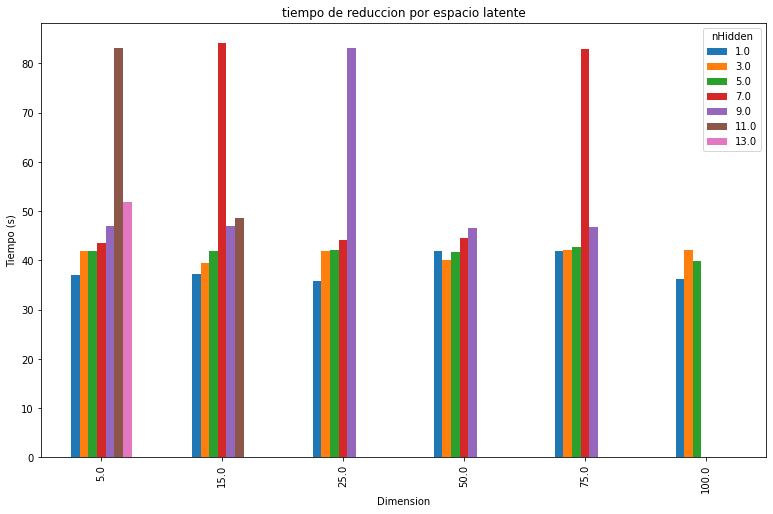

In [25]:
"""
fig, axs = plt.subplots(2,3)
fig.suptitle("Tiempos de reduccion para cada espacio latente \n")
fig.set_figheight(10)
fig.set_figwidth(13)
fig.tight_layout(pad=5.0)
i = 0
l = [5,15,25,50,75,100]
for ax in axs:
    for a in ax:
        a.set_xlabel("Capas ocultas")
        a.set_ylabel("Tiempo")
        a.set_title("Dim. Latente: " + str(l[i]))
        a.bar(dfs[i]["nHidden"].astype(int).astype(str),height=dfs[i]["t_red"])
        i = i + 1
        """
ticks = np.arange(0,1,0.05)
formats = df_performances.pivot("latent_dim","nHidden","t_red")
formats.plot(kind='bar',figsize=(13,8),xlabel="Dimension", ylabel = "Tiempo (s)", title="tiempo de reduccion por espacio latente")
plt.savefig("t-red-lat")

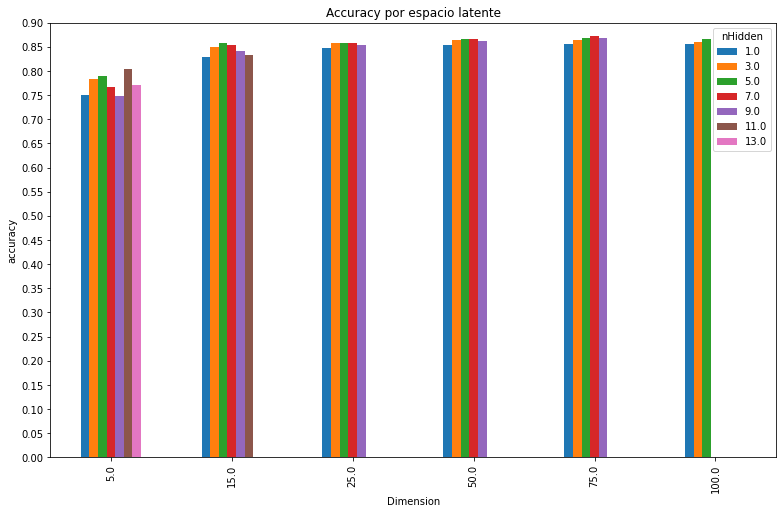

In [26]:
ticks = np.arange(0,1,0.05)
formats = df_performances.pivot("latent_dim","nHidden","acc")
formats.plot(kind='bar',figsize=(13,8),xlabel="Dimension", ylabel = "accuracy", yticks = ticks,ylim=(0,0.9), title="Accuracy por espacio latente")
plt.savefig("acc-lat")

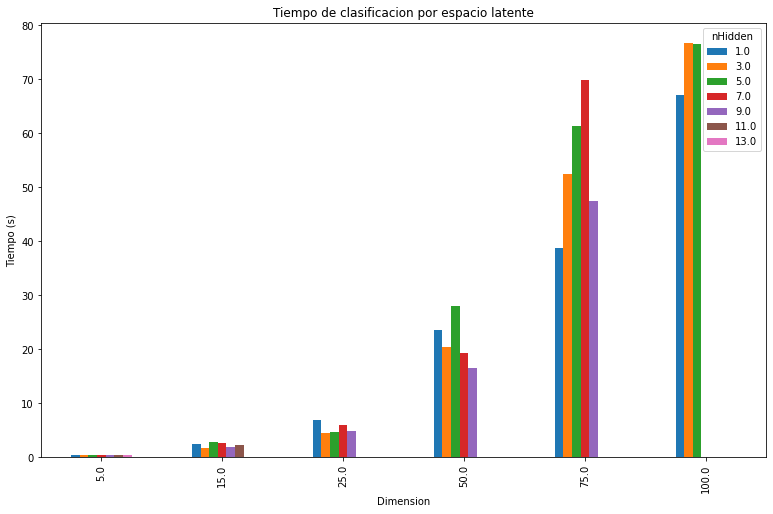

In [27]:
formats = df_performances.pivot("latent_dim","nHidden","t_classif")
formats.plot(kind='bar',figsize=(13,8),xlabel="Dimension", ylabel = "Tiempo (s)",title="Tiempo de clasificacion por espacio latente")
plt.savefig("t-train-lat")

## Observaciones:
1. El espacio latente parece no influir en el tiempo de entrenamiento del autoencoder (leves bajadas al subir la dimension).
2. Mayor profundidad tiende a un mayor tiempo de entrenamiento del autoencoder (con un par de excepciones).
3. A mayor espacio latente, leve aumento en el accuracy (osea que se logro disminuir la dimension significativamente preservandose la mayoria de la informacion).
4. No parece haber una relacion directa entre profundidad de la red y la variacion del accuracy.
5. Drasticas reducciones en el tiempo de clasificacion.